In [1]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
import pandas as pd

In [3]:
data = np.loadtxt("OBD_4_sensors_2.csv",delimiter=",")

In [4]:
data.shape

(48082, 5)

In [5]:
x = data[:,0:4]
y = data[:,4]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x.shape)
print(y.shape)

(48082, 4)
(48082,)


In [6]:
x.shape[1]

4

In [7]:
print(x_train.shape)
print(x_test.shape)

(38465, 4)
(9617, 4)


In [8]:
count=0 
for i in y_train:
    if (i==0) :
        count=count+1
print("0 :",count)
count=0 
for i in y:
    if (i==1) :
        count=count+1
print("1 :",count)
count=0 
for i in y:
    if (i==2) :
        count=count+1
print("2 :",count)
count=0 
for i in y:
    if (i==3) :
        count=count+1
print("3 :",count)
count=0 
for i in y:
    if (i==4) :
        count=count+1
print("4 :",count)
count=0 
for i in y:
    if (i==5) :
        count=count+1
print("5 :",count)
count=0 
for i in y:
    if (i==6) :
        count=count+1
print("6 :",count)
count=0 
for i in y:
    if (i==7) :
        count=count+1
print("7 :",count)
count=0 
for i in y:
    if (i==8) :
        count=count+1
print("8 :",count)

0 : 2393
1 : 3000
2 : 3000
3 : 3000
4 : 3042
5 : 3000
6 : 3000
7 : 3000
8 : 2999


In [9]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 16)
y_test = to_categorical(y_test, 16)

In [10]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Creating the model

In [12]:
model = Sequential()
model.add(Dense(8,input_dim=x.shape[1],activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(y_train.shape[1],activation='softmax'))

# Compiling and Training the model 

In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [14]:
learning_rate = 0.001

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
epochs = 50
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/50
1203/1203 [==============================] - 1s 1ms/step - loss: 1.7978 - accuracy: 0.4013 - val_loss: 1.0575 - val_accuracy: 0.6060
Epoch 2/50
1203/1203 [==============================] - 1s 968us/step - loss: 0.9435 - accuracy: 0.6536 - val_loss: 0.8639 - val_accuracy: 0.6686
Epoch 3/50
1203/1203 [==============================] - 1s 939us/step - loss: 0.7921 - accuracy: 0.7020 - val_loss: 0.7443 - val_accuracy: 0.7200
Epoch 4/50
1203/1203 [==============================] - 1s 923us/step - loss: 0.7137 - accuracy: 0.7290 - val_loss: 0.6805 - val_accuracy: 0.7449
Epoch 5/50
1203/1203 [==============================] - 1s 924us/step - loss: 0.6703 - accuracy: 0.7446 - val_loss: 0.6335 - val_accuracy: 0.7588
Epoch 6/50
1203/1203 [==============================] - 1s 931us/step - loss: 0.6385 - accuracy: 0.7536 - val_loss: 0.6114 - val_accuracy: 0.7602
Epoch 7/50
1203/1203 [==============================] - 1s 919us/step - loss: 0.6081 - accuracy: 0.7657 - val_loss: 0.5941 - v

# Plotting graphs for accuracy 

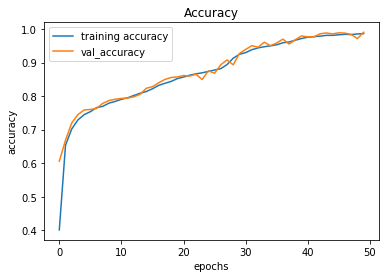

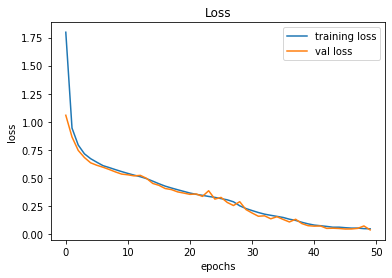

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Loading Model

In [16]:
model.save('anomaly_in_4_sensors_model.h5')

In [17]:
from keras.models import load_model

model = load_model('anomaly_in_4_sensors_model.h5')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 5

In [22]:
label=np.array(y_train)
print(label.shape)

(38465, 16)


In [23]:
# samples = np.array([[data[10000][0:4]]])      
# print(samples)
# prediction = model.predict_classes(samples)
# print(prediction)

In [56]:
samples = np.array([[90,110,45,45]])      
print(samples)
prediction = model.predict_classes(samples)
print(prediction)

[[ 90 110  45  45]]
[15]
